## Hands-on Lab: Final Project: Generative AI for Data Science

### Estimated Effort: 60 mins

## Project Scenario
You have been employed as a Data Scientist by a consultancy firm. The firm has a client who is a used car dealer. They have a special feature on Ford cars and they want your firm to design a model that can predict the optimum quotation price for the cars in their lot. They provide you with sales data for the past few years. The dataset contains different features of the cars and the price they were sold at.

The tasks assigned to you are as follows.

There might be a few duplicate entries and a few missing values in the dataset. Data cleaning will be a part of the assignment.
You have to perform exploratory data analysis to draw keen insights on the data and determine the effect of different features on the price. Some specific requests by the client include:
a. Identify number of sales for each fuel type
b. Identify which transmission type has more price outliers
Compare the models with linear, polynomial and ridge regressions on single and multiple variables to find the best performing model
Perform a Grid Search on the Ridge regression model to identify the optimum hyperparameter for the model for best performance.
You decide to use Generative AI to create python codes that can help you analyse the data, determine the best features and create the prediction model as per requirement.

Disclaimer: This is a fictitious scenario created for the purpose of this project. The dataset being used is publicly available.

## About the Dataset
This dataset contains used car sale prices for Ford cars. This is a public dataset available on the Kaggle website as Ford Car Pricing Dataset under the CC0: Public Domain license. The dataset has been slightly modified for the purpose of this project.

Attributes of this dataset have been explained below.

| Variable | Description |
|----------|-------------|
| model | Car model name |
| year | Year of car make |
| transmission | Type of transmission (Automatic, Manual or Semi-Auto) |
| mileage |	Number of miles traveled |
| fuelType | The type of fuel the car uses (Petrol, Diesel, Hybrid, Electric, Other) |
| tax |	Annual Tax payable in USD |
| mpg |	Miles per Gallon that the car runs at |
| engineSize |	Engine Size of the car |
| price | Price of car in USD |

## Code execution environment
To test the prompt-generated code, keep the Jupyter Notebook (in the link below) open in a separate tab in your web browser. The notebook has some setup instructions that you should complete now.

Jupyter-Lite Test Environment

Please note the lab environment above will only work on Windows (Google Chrome or Firefox browser). If you don’t have a Windows system with either of these browsers, use the lab environment provided in the next lesson of the module.

The data set for this lab is available in the following URL.

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"


## Write a Python code that can perform the following tasks.
1. Read the CSV file, located on a given file path, into a pandas data frame, assuming that the first row of the file can be used as the headers for the data.
2. Print the first 5 rows of the dataframe to verify correct loading.

In [1]:
# Code from ChatGPT

import pandas as pd

# Function to read the CSV file and display the first 5 rows
def load_and_preview_csv(file_path):
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)
        
        # Print the first 5 rows of the DataFrame
        print("First 5 rows of the DataFrame:")
        print(df.head())
    except FileNotFoundError:
        print(f"Error: The file at '{file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage: replace 'your_file_path.csv' with the actual path to your CSV file
file_path = 'your_file_path.csv'
load_and_preview_csv(file_path)


Error: The file at 'your_file_path.csv' was not found.


In [2]:
# My own code

import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(URL)

df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


## Data Preparation

### Data Cleaning
At this stage, it is required to clean up the data. As has been informed to you, the data may have missing values and duplicate entries. Write a prompt that performs the following tasks

Identifies the columns with missing values and fills the blank cells with average value of the columns.
Identifies and drops the duplicate entries from the data.

Write a python code that performs the following tasks:
1. Identify the columns of a data frame with missing values.
2. Replace the missing values thus identified with mean value of the column.
3. Deletes the duplicate entries from the data frame.

In [3]:
# ChatGPT code
import pandas as pd

def handle_missing_and_duplicates(df):
    # Task 1: Identify columns with missing values
    columns_with_missing = df.columns[df.isnull().any()]
    print(f"Columns with missing values: {list(columns_with_missing)}")
    
    # Task 2: Replace missing values with the mean of the column
    for column in columns_with_missing:
        if pd.api.types.is_numeric_dtype(df[column]):
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
        else:
            print(f"Skipping non-numeric column: {column}")
    
    # Task 3: Delete duplicate entries
    initial_row_count = len(df)
    df.drop_duplicates(inplace=True)
    final_row_count = len(df)
    print(f"Number of duplicates removed: {initial_row_count - final_row_count}")
    
    return df

# Example usage: Replace 'your_file_path.csv' with the actual file path
file_path = 'your_file_path.csv'

try:
    # Load the dataset
    data = pd.read_csv(file_path)
    print("Initial DataFrame:")
    print(data.head())
    
    # Process the DataFrame
    cleaned_data = handle_missing_and_duplicates(data)
    
    # Display the cleaned DataFrame
    print("\nCleaned DataFrame:")
    print(cleaned_data.head())
except FileNotFoundError:
    print(f"Error: The file at '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Error: The file at 'your_file_path.csv' was not found.


In [4]:
df.describe()

,year,mileage,tax,mpg,engineSize,price
count,17966.000000,17966.000000,17963.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,23362.608761,113.329177,57.906980,1.350807,12279.534844
std,2.050336,19472.054349,62.017631,10.125696,0.432367,4741.343657
min,1996.000000,1.000000,0.000000,20.800000,0.000000,495.000000
25%,2016.000000,9987.000000,30.000000,52.300000,1.000000,8999.000000
50%,2017.000000,18242.500000,145.000000,58.900000,1.200000,11291.000000
75%,2018.000000,31060.000000,145.000000,65.700000,1.500000,15299.000000
max,2060.000000,177644.000000,580.000000,201.800000,5.000000,54995.000000


In [5]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   transmission  17966 non-null  object 
 3   mileage       17966 non-null  int64  
 4   fuelType      17966 non-null  object 
 5   tax           17963 non-null  float64
 6   mpg           17966 non-null  float64
 7   engineSize    17966 non-null  float64
 8   price         17966 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB


In [6]:
df.shape

(17966, 9)

In [7]:
# My own code

# Identify columns with missing values
df.isnull().sum()

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             3
mpg             0
engineSize      0
price           0
dtype: int64

In [8]:
# Replace missing values with the mean of the column
mean_value = df['tax'].mean()
df['tax'].fillna(mean_value, inplace=True)  

In [9]:
# How many duplicates are there in the DataFrame?
df.duplicated().sum()

154

In [10]:
# Remove duplicate entries
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(17812, 9)

In [12]:
df.to_csv('cleaned_used_car_data.csv', index=False)

## Data Augmentation (optional)
Once cleaned, you may choose to augment this dataset with additional samples, created synthetically using Mostly.ai.

In [13]:
file_path = 'C:/Users/default.ASUS/OneDrive/Desktop/Courses/Data Science/Generative AI Elevate Your Data Science Career/cleaned_used_car_data/cleaned_used_car_data_augmented.csv'

df1 = pd.read_csv(file_path)

df1.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Kuga,2019,Manual,837,Diesel,145.389071,39.5,1.5,19851
1,Fiesta,2017,Manual,23514,Petrol,149.320967,62.9,1.0,9715
2,EcoSport,2017,Manual,22918,Petrol,147.075381,52.3,1.0,10997
3,Kuga,2013,Manual,45161,Hybrid,133.909423,61.2,2.0,9547
4,Fiesta,2017,Automatic,3431,Petrol,148.101029,54.3,1.0,16424


In [14]:
df1.shape

(17812, 9)

## Data Insights and Visualization
Write prompts that generate codes to prform the following actions.

1. Identify the 5 attributes that have the highest correlation with the price parameter.

   Write a python code that identifies the top 5 attributes with highest correlation with the target attribute in a data frame.

In [15]:
# ChatGPT code

import pandas as pd

# Example DataFrame
data = {
    "Feature1": [1, 2, 3, 4, 5],
    "Feature2": [5, 4, 3, 2, 1],
    "Feature3": [2, 3, 4, 5, 6],
    "Feature4": [10, 20, 30, 40, 50],
    "Target": [10, 20, 30, 40, 50],
}
df = pd.DataFrame(data)

# Define the target attribute
target_attribute = "Target"

# Compute correlations
correlation_matrix = df.corr()

# Extract correlations of features with the target attribute
target_correlations = correlation_matrix[target_attribute].drop(labels=[target_attribute])  # Exclude self-correlation

# Identify the top 5 attributes with the highest correlation
top_5_features = target_correlations.abs().sort_values(ascending=False).head(5)

print("Top 5 attributes with highest correlation to the target attribute:")
print(top_5_features)


Top 5 attributes with highest correlation to the target attribute:
Feature1    1.0
Feature2    1.0
Feature3    1.0
Feature4    1.0
Name: Target, dtype: float64


In [18]:
# My own code
# Write a python code that identifies the top 5 attributes with highest correlation with the target attribute in a data frame.

# 1. Identify the 5 attributes that have the highest correlation with the price parameter.

import pandas as pd
import numpy as np
from scipy.stats import pearsonr

df1 = pd.read_csv(file_path)

# Select numerical attributes
numerical_attributes = df1.select_dtypes(include=np.number)

# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['price'].drop('price')

# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []

for column in numerical_attributes.columns:
    if column != 'price':
        pearson_coefficient, p_value = pearsonr(numerical_attributes[column], df1['price'])
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)

# Create a new dataframe to store the results
results_df = pd.DataFrame({'Attribute': correlation_values.index, 'Correlation Value': correlation_values, 'Pearson Coefficient': pearson_coefficients, 'P-value': p_values})

# Print the results
print(results_df)


             Attribute  Correlation Value  Pearson Coefficient  P-value
year              year           0.583780             0.583780      0.0
mileage        mileage          -0.435966            -0.435966      0.0
tax                tax           0.342498             0.342498      0.0
mpg                mpg          -0.316955            -0.316955      0.0
engineSize  engineSize           0.415941             0.415941      0.0


2. Count the number of cars under each unique value of fuelType attribute.

   Write a python code that counts the number of entries in a dataframe with each unique value of a specific attribute.

In [ ]:
# ChatGPT code

import pandas as pd

# Example DataFrame (replace with your actual DataFrame)
data = {
    "model": ["Toyota", "Honda", "Ford", "BMW", "Honda", "Toyota"],
    "year": [2015, 2018, 2020, 2022, 2017, 2019],
    "transmission": ["Automatic", "Manual", "Semi-Auto", "Automatic", "Manual", "Automatic"],
    "mileage": [50000, 30000, 20000, 15000, 35000, 45000],
    "fuelType": ["Petrol", "Diesel", "Petrol", "Hybrid", "Electric", "Diesel"],
    "tax": [200, 250, 300, 150, 100, 200],
    "mpg": [25, 30, 22, 35, 50, 28],
    "engineSize": [1.8, 2.0, 2.5, 1.6, 1.2, 2.0],
    "price": [15000, 18000, 22000, 25000, 23000, 17000]
}

df = pd.DataFrame(data)

# Specify the attribute you want to count unique values for (e.g., 'fuelType')
attribute = 'fuelType'

# Count the occurrences of each unique value in the specified attribute
value_counts = df[attribute].value_counts()

# Print the result
print(f"Count of unique values in '{attribute}':")
print(value_counts)



In [20]:
# My own code 
# Write a python code that counts the number of entries in a dataframe with each unique value of a specific attribute.

# 2. Count the number of cars under each unique value of fuelType attribute.

df1['fuelType'].value_counts()

fuelType
Petrol    11930
Diesel     5840
Hybrid       37
_RARE_        5
Name: count, dtype: int64

3. Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers. Use the Seaborn library for creating the plot.

   Write a python code that creates a Seaborn box plot between a source and target attributes of a dataframe.

In [ ]:
# ChatGPT code

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
data = {
    "source": ["A", "B", "A", "B", "A", "B", "C", "C", "A", "B"],
    "target": [100, 150, 120, 170, 110, 160, 140, 180, 115, 155]
}

df = pd.DataFrame(data)

# Create a Seaborn boxplot between 'source' and 'target'
plt.figure(figsize=(8, 6))
sns.boxplot(x="source", y="target", data=df)

# Display the plot
plt.title('Boxplot of Target Attribute by Source Attribute')
plt.show()


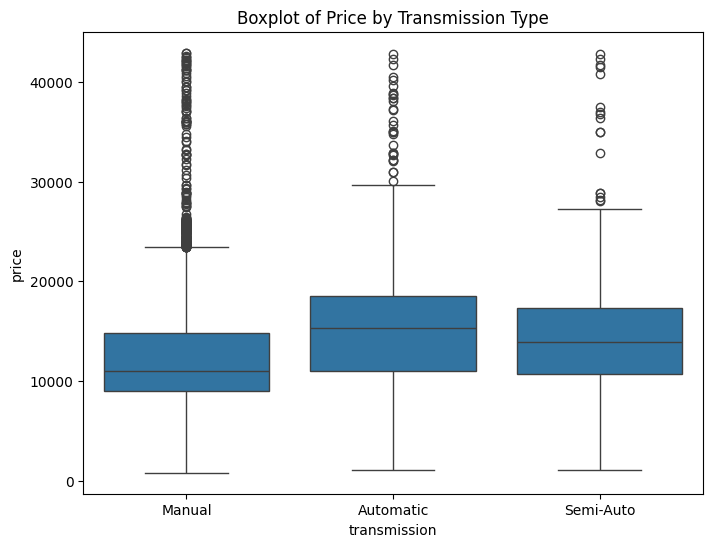

In [22]:
# My own code

# 3. Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers. 
#    Use the Seaborn library for creating the plot.

import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to compare the distribution of 'price' based on 'transmission' type
plt.figure(figsize=(8, 6))
sns.boxplot(x='transmission', y='price', data=df1)
plt.title('Boxplot of Price by Transmission Type')
plt.show()

4. Generate the regression plot between mpg parameter and the price to determine the correlation type between the two.

   Write a python code that creates a regression plot between a source attribute and a target attribute.

In [ ]:
# ChatGPT code

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
data = {
    "source": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "target": [10, 20, 25, 35, 40, 50, 55, 60, 70, 75]
}

df = pd.DataFrame(data)

# Create a regression plot between 'source' and 'target'
plt.figure(figsize=(8, 6))
sns.regplot(x="source", y="target", data=df)

# Display the plot
plt.title('Regression Plot between Source and Target')
plt.show()


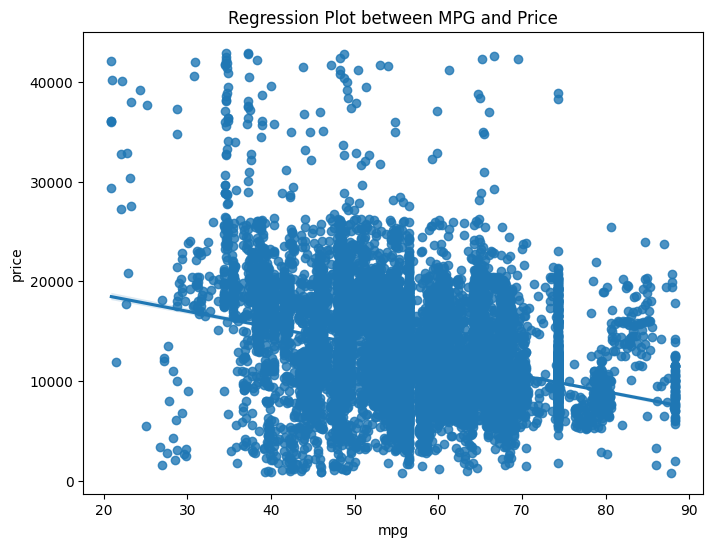

In [24]:
# My own code
# 4. Generate the regression plot between mpg parameter and the price to determine the correlation type between the two.

plt.figure(figsize=(8, 6))
sns.regplot(x='mpg', y='price', data=df1)
plt.title('Regression Plot between MPG and Price')
plt.show()

## Model Development and Evaluation
Write prompts that generate codes to perform the following actions.

1. Fit a linear regression model to predict the price using the feature mpg. Then calculate the R^2 and MSE values for the model.

Write a python code to fit a linear regression model on a target variable on basis of a source variable. Calculate the R^2 values and MSE values for this model.

In [ ]:
# Chat GPT code

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
data = {
    "source": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "target": [10, 20, 25, 35, 40, 50, 55, 60, 70, 75]
}

df = pd.DataFrame(data)

# Reshape the 'source' column to be a 2D array as required by scikit-learn
X = df["source"].values.reshape(-1, 1)  # Source variable
y = df["target"].values  # Target variable

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the target variable using the trained model
y_pred = model.predict(X)

# Calculate R^2 (Coefficient of Determination)
r2 = r2_score(y, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y, y_pred)

# Print the R^2 and MSE values
print(f"R^2 Value: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

# Plotting the regression line and scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Target vs Source')
plt.xlabel('Source')
plt.ylabel('Target')
plt.legend()
plt.show()


In [26]:
# My own code
# 1. Fit a linear regression model to predict the price using the feature mpg. Then calculate the R^2 and MSE values for the model.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract the source variable and target variable from the data frame
X = df1[['mpg']]
y = df1['price']

# Initialize a linear regression model
model = LinearRegression()

# Train the model using the source and target variables
model.fit(X, y)

# Make predictions using the trained model
y_pred = model.predict(X)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 20713904.051435817
Coefficient of Determination (R^2): 0.10046065058795661


2. Fit a linear regression model to predict the price using the following set of features.
   year, mileage, tax, mpg and engineSize.
   Calculate the R^2 and MSE values for this model.

   Write a python code to fit a linear regression model on a target variable on basis of a set of source variables. Calculate the R^2 values and MSE values for this model.

In [ ]:
# Code from ChatGPT

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# Replace 'your_dataset.csv' with your actual dataset file
# Ensure columns include: 'year', 'mileage', 'tax', 'mpg', 'engineSize', 'price'
df = pd.read_csv('your_dataset.csv')

# Features and target
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2: {r2}")
print(f"MSE: {mse}")


In [27]:
# My own code

# Define the feature set and target variable
X_features = df1[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y_target = df1['price']

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the feature set and target variable
model.fit(X_features, y_target)

# Make predictions using the trained model
y_pred = model.predict(X_features)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_target, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_target, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 8447709.281053713
Coefficient of Determination (R^2): 0.6331427000998202


3. For the same set of features as in the question above, create a pipeline model object that uses standard scalar, second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.

Write a python code that can perform the following tasks.

1. Create a pipeline with standard scalar, second degree polynomial features and linear regression model.
2. Fit this pipeline for a target variable using a set of source attributes from a dataframe.
3. Evaluate the R^2 and MSE values for the trained model.

In [ ]:
# ChatGPT code

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Example dataset (replace with your actual dataset)
# Ensure your dataframe includes the source attributes and the target variable
data = {
    'year': [2010, 2011, 2012, 2013, 2014],
    'mileage': [50000, 60000, 70000, 80000, 90000],
    'tax': [150, 160, 170, 180, 190],
    'mpg': [40, 35, 30, 25, 20],
    'engineSize': [1.2, 1.4, 1.6, 1.8, 2.0],
    'price': [5000, 5500, 6000, 6500, 7000]
}
df = pd.DataFrame(data)

# Features (source attributes) and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler, PolynomialFeatures, and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('poly', PolynomialFeatures(degree=2)),  # Add polynomial features of degree 2
    ('model', LinearRegression())  # Linear regression model
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict using the trained pipeline
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2: {r2}")
print(f"MSE: {mse}")


In [29]:
# My own code

import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assume you have a pandas data frame called 'data_frame' with multiple columns: 'source_variable_1', 'source_variable_2', ..., 'target_variable'

# Extract the source variables and target variable from the data frame
X = df1[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df1['price']

# Create a pipeline that performs parameter scaling, polynomial feature generation, and linear regression
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    LinearRegression()
)

# Train the model using the source and target variables
pipeline.fit(X, y)

# Make predictions using the trained model
y_pred = pipeline.predict(X)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 7300393.124767291
Coefficient of Determination (R^2): 0.682967012611506


4. For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

Write a python code that can perform the following tasks.

1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
2. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
3. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.

In [ ]:
# ChatGPT code

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Example dataset (replace this with your actual dataset)
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [10, 20, 30, 40, 50],
    'feature3': [5, 10, 15, 20, 25],
    'target': [7, 14, 21, 28, 35]
}
df = pd.DataFrame(data)

# Define source attributes (features) and target attribute
X = df[['feature1', 'feature2', 'feature3']]
y = df['target']

# 1. Split the data into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create and fit a Ridge regression model with alpha=0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# 3. Calculate predictions, MSE, and R^2
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2: {r2}")


In [30]:
# My own code
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define the feature set and target variable
X = df1[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df1['price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Ridge regression model using the training data, setting the regularization parameter alpha=0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Calculate predictions, MSE and R^2
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2: {r2}")

Mean Squared Error (MSE): 8875565.425894488
R^2: 0.6181755645531503


5. Perform a second order polynomial transform on both the training data and testing data created for the question above. Create and fit a Ridge regression object using the modified training data, set the regularisation parameter to 0.1, and calculate the R^2 and MSE utilising the modified test data.

Write a python code that can perform the following tasks.

1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
2. Apply second degree polynomial scaling to the training and testing data.
3. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.

In [ ]:
# ChatGPT code
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Example dataset (replace this with your actual dataset)
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [10, 20, 30, 40, 50],
    'feature3': [5, 10, 15, 20, 25],
    'target': [7, 14, 21, 28, 35]
}
df = pd.DataFrame(data)

# Define source attributes (features) and target attribute
X = df[['feature1', 'feature2', 'feature3']]
y = df['target']

# 1. Split the data into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create a pipeline for polynomial scaling and Ridge regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Second-degree polynomial features
    ('scaler', StandardScaler()),           # Standardize the features
    ('ridge', Ridge(alpha=0.1))             # Ridge regression with alpha=0.1
])

# 3. Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# 4. Predict and calculate evaluation metrics
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2: {r2}")


In [31]:
# My own code
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Define the feature set and target variable
X = df1[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df1['price']

# Split the data into training and testing sets (80% training, 20% testing) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for polynomial scaling and Ridge regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Second-degree polynomial features
    ('scaler', StandardScaler()),           # Standardize the features
    ('ridge', Ridge(alpha=0.1))              # Ridge regression with alpha=0.1
])

# Fit the pipeline to the training data     
pipeline.fit(X_train, y_train)

# Predict and calculate evaluation metrics
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2: {r2}")


Mean Squared Error (MSE): 8450414.407663064
R^2: 0.6364654469128994


6. In the question above, perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross     validation to find the optimum value of alpha to be used for the prediction model.

Write a python code that can perform the following tasks.

1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
2. Apply second degree polynomial scaling to the training and testing data.
3. Create and fit a Grid search on Ridge regression with cross validation using the training data, for a set of values of the parameter alpha.
4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.


In [ ]:
# ChatGPT code

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Example dataset (replace this with your actual dataset)
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [10, 20, 30, 40, 50],
    'feature3': [5, 10, 15, 20, 25],
    'target': [7, 14, 21, 28, 35]
}
df = pd.DataFrame(data)

# Define source attributes (features) and target attribute
X = df[['feature1', 'feature2', 'feature3']]
y = df['target']

# 1. Split the data into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create a pipeline for polynomial scaling and Ridge regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Second-degree polynomial features
    ('scaler', StandardScaler()),           # Standardize the features
    ('ridge', Ridge())                      # Ridge regression placeholder for GridSearchCV
])

# 3. Perform a Grid Search with Cross Validation for Ridge Regression
param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}  # Range of alpha values
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# 4. Predict and calculate evaluation metrics using the testing data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Best Alpha: {grid_search.best_params_['ridge__alpha']}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2: {r2}")


In [32]:
# My own code

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define the feature set and target variable    
X = df1[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df1['price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for polynomial scaling and Ridge regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Second-degree polynomial features
    ('scaler', StandardScaler()),           # Standardize the features
    ('ridge', Ridge())                      # Ridge regression placeholder for GridSearchCV
])

# Perform a Grid Search with Cross Validation for Ridge Regression
param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}  # Range of alpha values
grid_search = GridSearchCV(pipeline, param_grid, cv=4)  # 4-fold cross-validation
grid_search.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = grid_search.predict(X)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 7548501.825917902
Coefficient of Determination (R^2): 0.6721924363142379


## Conclusion
Congratulations! You have completed this guided project on using Generative AI for different data science tasks.

By the end of this project, you are now capable of using Generative AI for the tasks of:

Data preparation - cleaning, transforming and augmentation
Data analysis - drawing insight, creating visualizations
Model development - creating simple as well as complex prediction models
Model refinement - found the optimum model using Grid Search